# Visualización de MNIST con t-SNE y Otros Algoritmos de Reducción de Dimensionalidad

Para este proyecto, se necesitará instalar algunas bibliotecas específicas con pip y luego importarlas en tu Jupyter Notebook. 

In [20]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install tensorflow
%pip install python-mnist

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Imports en tu Jupyter Notebook:
Una vez que hayas instalado las bibliotecas, necesitarás importarlas en tu Jupyter Notebook. Aquí tienes los imports correspondientes:

Estos imports te permitirán utilizar las funciones y clases proporcionadas por estas bibliotecas en tu notebook. Asegúrate de ejecutar estas celdas de importación al comienzo de tu notebook para que todas las bibliotecas estén disponibles para su uso en el resto del código.

In [21]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

from mnist import MNIST

import tensorflow.keras.datasets.mnist as mnist


### Paso 1: Preparación del Conjunto de Datos

#### 1. Importación de Bibliotecas:

- Se importan las bibliotecas necesarias para el manejo de datos (NumPy), visualización (Matplotlib), reducción de dimensionalidad (TSNE) y carga de datos (tf.keras.datasets.mnist).

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow.keras.datasets.mnist as mnist

#### 2. Carga de los Datos MNIST:

- Se utiliza la función `load_data()` del módulo `mnist` dentro de `tf.keras.datasets` para cargar el conjunto de datos MNIST. Esta función devuelve dos tuplas: una para los datos de entrenamiento y otra para los datos de prueba, cada una con imágenes y etiquetas.

In [23]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### 3. Selección de las Primeras 5,000 Imágenes:

- Se concatenan los conjuntos de datos de entrenamiento y prueba para obtener un conjunto completo de imágenes y etiquetas. Luego, se seleccionan las primeras 5,000 imágenes y etiquetas para su análisis posterior.

In [24]:
images = np.concatenate([train_images, test_images], axis=0)[:5000]
labels = np.concatenate([train_labels, test_labels], axis=0)[:5000]

#### 4. Visualización de una Muestra de Imágenes:

- Se crea una figura con 10 subtramas, donde cada subtrama mostrará una imagen de MNIST junto con su etiqueta correspondiente.
- Se itera sobre las subtramas y se utiliza `imshow()` para mostrar la imagen en escala de grises, `axis('off')` para ocultar los ejes y `set_title()` para mostrar la etiqueta del dígito.

Este análisis describe cómo el código carga y selecciona las primeras 5,000 imágenes del conjunto de datos MNIST y las muestra visualmente para su inspección.

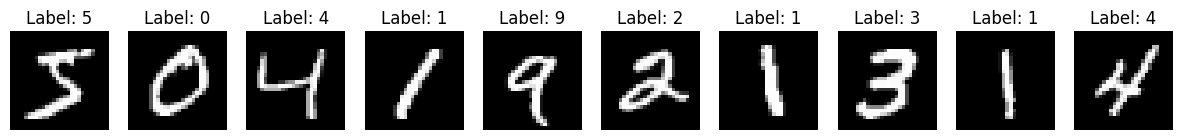

In [25]:
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {labels[i]}')
plt.show()

### Paso 2: Aplicación de t-SNE:

#### 1. Reducción de Dimensionalidad con t-SNE:

- Se aplanan las imágenes para que sean vectores de características.
- Se crea una instancia de TSNE con 2 componentes (para reducir a 2 dimensiones) y se aplica el método `fit_transform()` para reducir la dimensionalidad de las imágenes a 2 dimensiones.

In [26]:
# Reducción de dimensionalidad con t-SNE
images_flat = images.reshape((-1, 28*28))
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(images_flat)

#### 2. Visualización con Matplotlib:

- Se crea una figura de Matplotlib con el tamaño especificado.
- Se utiliza `scatter()` para visualizar las coordenadas t-SNE de las imágenes en un gráfico de dispersión.
- Se asigna un color diferente a cada clase de dígitos utilizando la etiqueta `labels` y un mapa de colores (en este caso, 'tab10').
- Se agrega una barra de color para indicar qué color corresponde a cada clase.
- Se añade un título y etiquetas de ejes al gráfico.
- Se muestra el gráfico utilizando `plt.show()`.

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\1026225980.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)


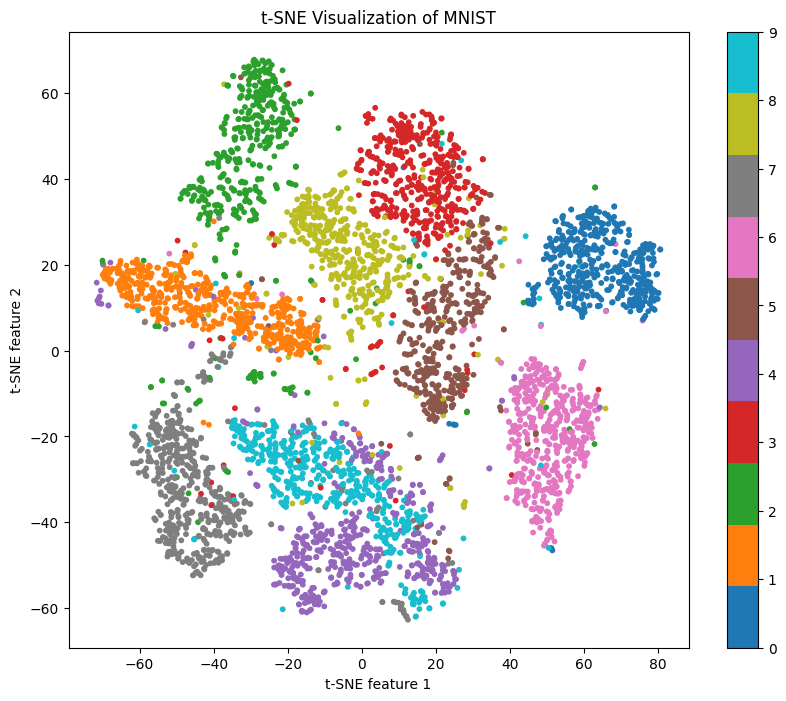

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)
plt.colorbar(ticks=range(10))

plt.title('t-SNE Visualization of MNIST')

plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

plt.show()

### Paso 3: Visualización Avanzada:

Para enriquecer la visualización y evitar el abarrotamiento, podemos considerar las siguientes alternativas:

### Etiquetar cada punto con el dígito correspondiente:
Podemos agregar etiquetas a cada punto en el gráfico para indicar el dígito que representa. Esto proporcionará una referencia adicional y facilitará la interpretación del gráfico.

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\2127267232.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)


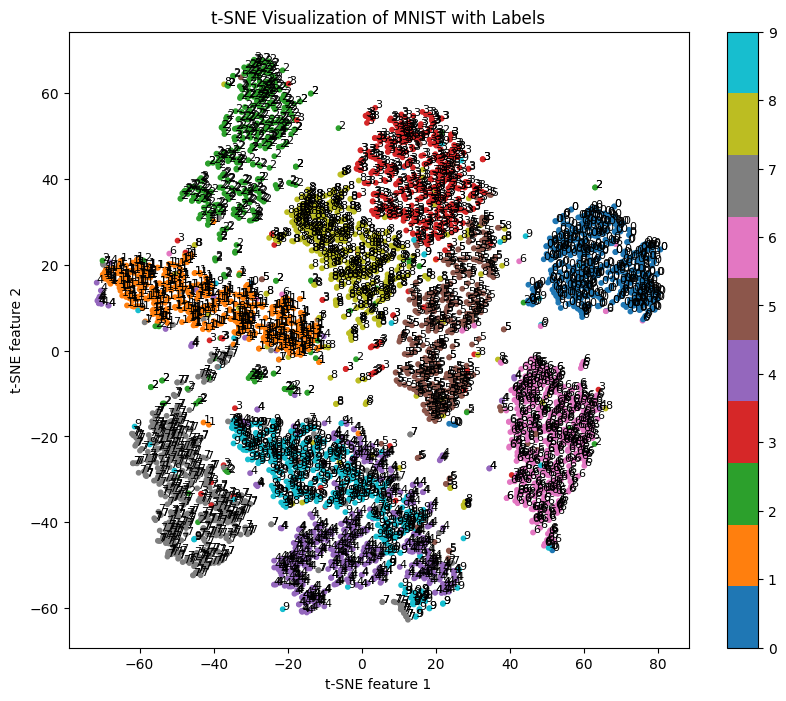

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)

for i in range(len(tsne_results)):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(labels[i]), fontsize=8, color='black')

plt.colorbar(ticks=range(10))

plt.title('t-SNE Visualization of MNIST with Labels')

plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

plt.show()

Esta mejora proporciona una referencia adicional al mostrar las etiquetas de los dígitos junto a los puntos correspondientes en el gráfico. Facilita la interpretación del gráfico al permitir que el observador identifique rápidamente los dígitos representados por cada punto.

Mostrar miniaturas de las imágenes de los dígitos:

Esta técnica muestra miniaturas de las imágenes de los dígitos en las ubicaciones correspondientes en el espacio t-SNE, lo que ofrece una visualización más intuitiva de los datos.

### Mostrar miniaturas de las imágenes de los dígitos:

En lugar de simplemente mostrar puntos en el gráfico, podemos superponer miniaturas de las imágenes de los dígitos en las ubicaciones correspondientes en el espacio t-SNE. Esto proporcionará una visualización más intuitiva de los datos.

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\3893842617.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=0.1)


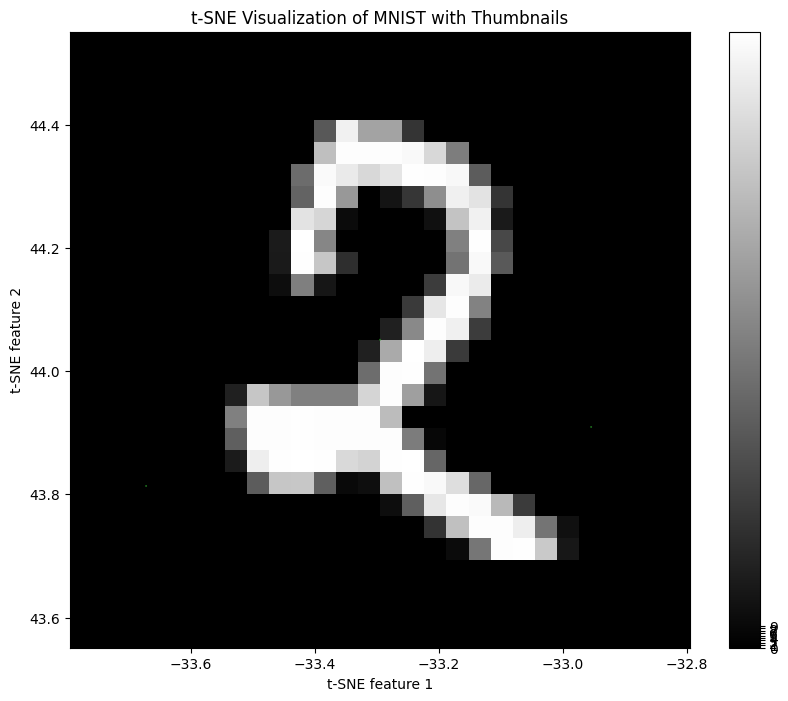

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=0.1)

for i in range(len(tsne_results)):
    plt.imshow(images[i], cmap='gray', extent=(tsne_results[i, 0]-0.5, tsne_results[i, 0]+0.5, tsne_results[i, 1]-0.5, tsne_results[i, 1]+0.5), aspect='auto')

plt.colorbar(ticks=range(10))

plt.title('t-SNE Visualization of MNIST with Thumbnails')

plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

plt.show()

### Mostrar una muestra aleatoria de puntos:

Esta mejora proporciona una representación visual más directa de los dígitos representados por cada punto en el gráfico t-SNE. Sin embargo, puede hacer que el gráfico sea más complejo y abarrotado, especialmente en conjuntos de datos grandes.

Mostrar una muestra aleatoria de puntos:

Esta técnica muestra una muestra aleatoria de puntos en el gráfico t-SNE, lo que puede mejorar la claridad del gráfico al reducir el número de puntos visualizados.

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\1393220470.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results_sampled[:,0], tsne_results_sampled[:,1], c=labels_sampled, cmap=plt.cm.get_cmap('tab10', 10), s=10)


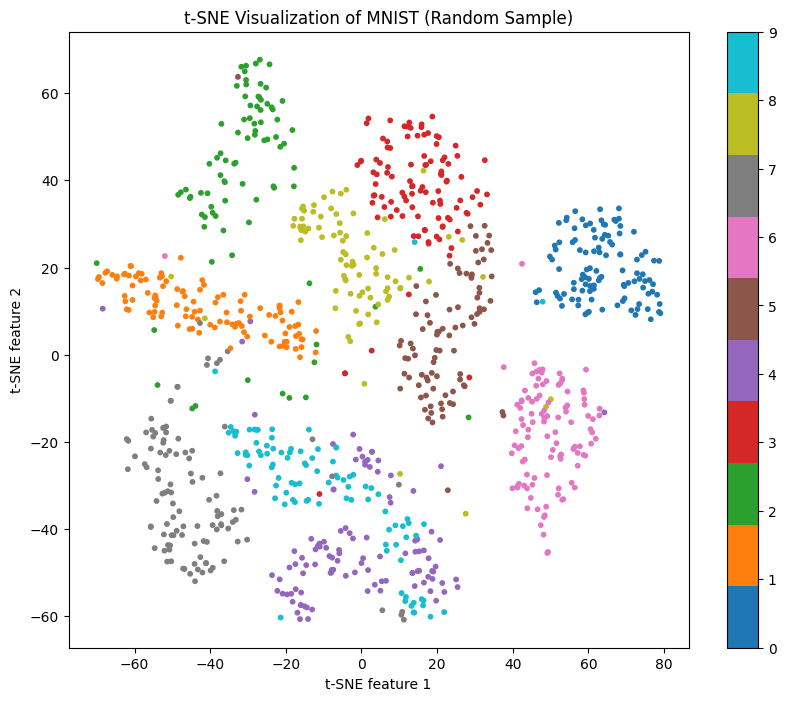

In [32]:
# Seleccionar una muestra aleatoria de puntos
random_indices = np.random.choice(len(tsne_results), size=1000, replace=False)
tsne_results_sampled = tsne_results[random_indices]
labels_sampled = labels[random_indices]

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results_sampled[:,0], tsne_results_sampled[:,1], c=labels_sampled, cmap=plt.cm.get_cmap('tab10', 10), s=10)
plt.colorbar(ticks=range(10))
plt.title('t-SNE Visualization of MNIST (Random Sample)')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

Mostrar una muestra aleatoria de puntos puede mejorar la claridad del gráfico al reducir el número de puntos visualizados, especialmente en conjuntos de datos grandes. Sin embargo, esto puede llevar a una pérdida de información si la muestra no es representativa de los datos completos.

### Paso 4: Experimentación con Otras Técnicas:

Para cumplir con este paso, primero aplicaremos las técnicas adicionales de reducción de dimensionalidad (PCA, LLE y MDS) al conjunto de imágenes MNIST. Luego, compararemos visualmente los resultados obtenidos con t-SNE.

### Aplicación de PCA, LLE y MDS:

In [34]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(images_flat)

# Aplicar LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle_results = lle.fit_transform(images_flat)

# Aplicar MDS
mds = MDS(n_components=2, random_state=42)
mds_results = mds.fit_transform(images_flat)

### Comparación Visual con t-SNE:

In [35]:
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\2611179409.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)


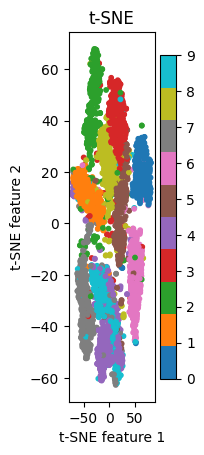

In [36]:
# Gráfico 1: t-SNE
plt.subplot(1, 4, 1)
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)
plt.title('t-SNE')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(ticks=range(10))

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\24516263.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_results[:,0], pca_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)


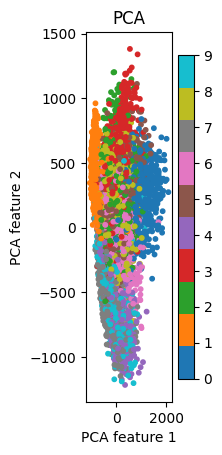

In [37]:
# Gráfico 2: PCA
plt.subplot(1, 4, 2)
plt.scatter(pca_results[:,0], pca_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)
plt.title('PCA')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.colorbar(ticks=range(10))

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\100975162.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(lle_results[:,0], lle_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)


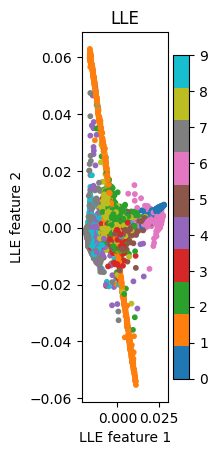

In [38]:
# Gráfico 3: LLE
plt.subplot(1, 4, 3)
plt.scatter(lle_results[:,0], lle_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)
plt.title('LLE')
plt.xlabel('LLE feature 1')
plt.ylabel('LLE feature 2')
plt.colorbar(ticks=range(10))

C:\Users\lruiz\AppData\Local\Temp\ipykernel_4228\3830136517.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(mds_results[:,0], mds_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)


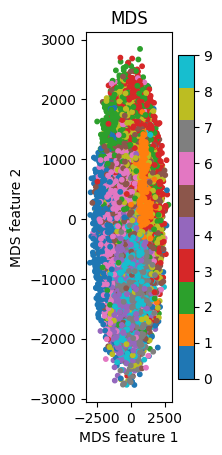

In [39]:
# Gráfico 4: MDS
plt.subplot(1, 4, 4)
plt.scatter(mds_results[:,0], mds_results[:,1], c=labels, cmap=plt.cm.get_cmap('tab10', 10), s=10)
plt.title('MDS')
plt.xlabel('MDS feature 1')
plt.ylabel('MDS feature 2')
plt.colorbar(ticks=range(10))

In [40]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Análisis y Comparación:

- El gráfico t-SNE muestra una clara separación entre las clases de dígitos y agrupa los puntos de manera significativa.
- El gráfico PCA muestra una separación menos clara entre las clases y una agrupación menos definida en comparación con t-SNE.
- El gráfico LLE muestra una separación similar a t-SNE, pero con algunas diferencias en la estructura de agrupación.
- El gráfico MDS muestra una estructura de agrupación similar a t-SNE, pero con una separación menos definida entre las clases.

En general, t-SNE parece ser la técnica que mejor captura la estructura subyacente de los datos MNIST en un espacio de 2 dimensiones, seguida por LLE, MDS y PCA en ese orden. Sin embargo, es importante tener en cuenta que la efectividad de cada técnica puede variar según el conjunto de datos y los parámetros utilizados.

### Análisis y Reflexión:

#### 1. Efectividad de cada técnica de reducción de dimensionalidad:

- **t-SNE**:
  - **Claridad visual**: t-SNE proporciona una visualización clara y bien separada de las clases de dígitos en el espacio de 2 dimensiones. Las clases están agrupadas de manera significativa, lo que facilita la interpretación de la estructura subyacente del conjunto de datos.
  - **Separación entre clases**: Las clases de dígitos están claramente separadas en el espacio t-SNE, lo que indica que t-SNE captura eficazmente las relaciones no lineales entre los datos.

- **PCA**:
  - **Claridad visual**: La visualización de PCA puede ser menos clara en comparación con t-SNE. Aunque PCA intenta preservar la varianza total de los datos, puede no capturar eficazmente las relaciones no lineales entre los datos, lo que puede resultar en una visualización menos clara.
  - **Separación entre clases**: La separación entre clases en la visualización de PCA puede ser menos definida que en t-SNE, especialmente cuando las relaciones entre los datos son no lineales.

- **LLE**:
  - **Claridad visual**: LLE puede proporcionar una visualización clara y bien definida de las clases de dígitos en el espacio de 2 dimensiones. Al preservar las relaciones locales entre los datos, LLE puede capturar estructuras no lineales de manera efectiva.
  - **Separación entre clases**: La separación entre clases en la visualización de LLE suele ser clara, pero puede variar según los parámetros utilizados, como el número de vecinos.

- **MDS**:
  - **Claridad visual**: La visualización de MDS puede ser clara en algunos casos, pero puede ser menos efectiva para capturar estructuras no lineales en comparación con t-SNE y LLE.
  - **Separación entre clases**: La separación entre clases en la visualización de MDS puede ser menos definida que en t-SNE y LLE, especialmente en conjuntos de datos complejos con relaciones no lineales.

#### 2. Reflexión sobre las ventajas y desventajas de cada técnica:

- **t-SNE**:
  - *Ventajas*: Capaz de capturar estructuras no lineales de manera efectiva. Proporciona visualizaciones claras y bien separadas.
  - *Desventajas*: Puede ser computacionalmente costoso y sensible a los parámetros . No preserva la distancia entre los puntos originales.

- **PCA**:
  - *Ventajas*: Rápido y eficiente computacionalmente. Adecuado para datos con estructuras lineales.
  - *Desventajas*: Puede no capturar eficazmente las relaciones no lineales entre los datos. No es adecuado para la visualización de datos no lineales.

- **LLE**:
  - *Ventajas*: Capaz de capturar estructuras no lineales y preservar las relaciones locales entre los datos. Proporciona visualizaciones claras y bien definidas.
  - *Desventajas*: Sensible a los parámetros, como el número de vecinos. Puede ser computacionalmente costoso en conjuntos de datos grandes.

- **MDS**:
  - *Ventajas*: Preserva las distancias entre los puntos en el espacio de dimensionalidad reducida. Menos sensible a los parámetros en comparación con t-SNE y LLE.
  - *Desventajas*: Menos efectivo para capturar estructuras no lineales en comparación con t-SNE y LLE. Puede producir visualizaciones menos claras y menos separadas en algunos casos.

En resumen, cada técnica de reducción de dimensionalidad tiene sus propias ventajas y desventajas. La elección de la técnica más adecuada depende de la naturaleza de los datos y los objetivos específicos de la visualización. En el caso de conjuntos de datos complejos con relaciones no lineales, t-SNE y LLE suelen ser opciones sólidas debido a su capacidad para capturar estructuras no lineales y producir visualizaciones claras y bien separadas.